# Import Required Library

In [1]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df=pd.read_excel(r'C:\Users\booba\Downloads\Data.xlsx')
df.columns

Index(['Loan Ac Number', 'loanRequestAmount', 'loanRequestTenure',
       'Application Start Date', 'Application End Date', 'flag_Disbursed',
       'currentDelinquency', 'purposeDescription', 'flagSecondMobileNumber',
       'paymentDay', 'industryDescription', 'incomeMultiple', 'natureofwork',
       'maritalStatus', 'dependentsCount', 'age', 'monthlyIncome', 'gender',
       'docType', 'subIndustryDescription', 'STATE', 'ZipCodes',
       'salaryBankName'],
      dtype='object')

Totally, We have a 23 columns in the dataset and currentDelinquency column is the target column.

In [3]:
#For my easyway to approach the data. Hence,I have moved to end
df.insert(len(df.columns)-1, 'currentDelinquency', df.pop('currentDelinquency'))

# Checking Data type and Shape

In [4]:
df.dtypes

Loan Ac Number                     int64
loanRequestAmount                  int64
loanRequestTenure                  int64
Application Start Date    datetime64[ns]
Application End Date      datetime64[ns]
flag_Disbursed                     int64
purposeDescription                object
flagSecondMobileNumber             int64
paymentDay                         int64
industryDescription               object
incomeMultiple                   float64
natureofwork                      object
maritalStatus                     object
dependentsCount                   object
age                                int64
monthlyIncome                    float64
gender                            object
docType                           object
subIndustryDescription            object
STATE                             object
ZipCodes                           int64
salaryBankName                    object
currentDelinquency                 int64
dtype: object

In [5]:
df.shape

(6700, 23)

In [7]:
df=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Loan Ac Number          6700 non-null   int64         
 1   loanRequestAmount       6700 non-null   int64         
 2   loanRequestTenure       6700 non-null   int64         
 3   Application Start Date  6700 non-null   datetime64[ns]
 4   Application End Date    6700 non-null   datetime64[ns]
 5   flag_Disbursed          6700 non-null   int64         
 6   purposeDescription      6700 non-null   object        
 7   flagSecondMobileNumber  6700 non-null   int64         
 8   paymentDay              6700 non-null   int64         
 9   industryDescription     6700 non-null   object        
 10  incomeMultiple          6700 non-null   float64       
 11  natureofwork            6700 non-null   object        
 12  maritalStatus           6700 non-null   object  

From the above info - we can clearly see there is null value in 3 columns because each column should contain 6700 rows if not then it have null value

# Checking Unique Value only in doubtfull column

In [6]:
df["dependentsCount"].unique()

array([nan, 3, 2, 1, 4, '5 or more'], dtype=object)

In [7]:
df["docType"].unique()

array(['Professional Driving License (2017)', 'UMID Card #3', 'UMID',
       'Driving License (2017) #2', 'Driving License (2017) #3',
       'UMID Card #2', 'UMID Card #1', 'Passport',
       'Social Security Card #1', 'Professional Id Card #1',
       'ePassport (2016)', 'Postal Id Card #2', 'Drivers License',
       'Professional Id Card #2', 'Postal ID', nan, 'SSS', 'ePassport',
       'ePassport (2010)', 'PRC ID', 'Professional Id Card',
       'Driving License', 'Driving License #2', 'Postal Id Card',
       'UMID Card', 'ePassport #4', 'Driving License (2017) Side B',
       'Passport (2007)', 'Driving License (2017) #1', 'ePassport #5'],
      dtype=object)

# Treating Missing Value and Dropping columns

In [8]:
df["dependentsCount"]=df["dependentsCount"].replace(to_replace=["5 or more"],value=5)
df["dependentsCount"]=df["dependentsCount"].fillna(0)
df["dependentsCount"]=df["dependentsCount"].astype(int)

In [9]:
df["docType"]=df["docType"].replace(to_replace=["UMID Card #3","UMID","UMID Card #2","UMID Card #1"],value="UMID Card")
df["docType"]=df["docType"].replace(to_replace=["Professional Driving License (2017)","Driving License (2017) #2","Driving License (2017) #3","Drivers License","Driving License #2","Driving License (2017) Side B","Driving License (2017) #1"],value="Driving License")
df["docType"]=df["docType"].replace(to_replace=["Passport (2007)","Driving License (2017) #2","ePassport #5","ePassport #4","ePassport","ePassport (2010)","ePassport (2016)"],value="Passport")
df["docType"]=df["docType"].replace(to_replace=["Professional Id Card #1","Professional Id Card #2"],value="Professional Id Card")
df["docType"]=df["docType"].replace(to_replace=["Postal Id Card #2","Postal Id Card"],value="Postal ID")
df["docType"]=df["docType"].replace(to_replace=["Social Security Card #1"],value="Social Security Card")
df["docType"]=df["docType"].replace(np.nan,"No proof")

In [10]:
df["STATE"]=df["STATE"].replace(np.nan,"No Detail")

In [11]:
df=df.drop(['Loan Ac Number','Application Start Date','Application End Date','flag_Disbursed'],axis=1)
df.columns

Index(['loanRequestAmount', 'loanRequestTenure', 'purposeDescription',
       'flagSecondMobileNumber', 'paymentDay', 'industryDescription',
       'incomeMultiple', 'natureofwork', 'maritalStatus', 'dependentsCount',
       'age', 'monthlyIncome', 'gender', 'docType', 'subIndustryDescription',
       'STATE', 'ZipCodes', 'salaryBankName', 'currentDelinquency'],
      dtype='object')

We have successfully removed the 4 columns from the dataset because here no use to contain the details for upcoming step.

In [12]:
df.dtypes

loanRequestAmount           int64
loanRequestTenure           int64
purposeDescription         object
flagSecondMobileNumber      int64
paymentDay                  int64
industryDescription        object
incomeMultiple            float64
natureofwork               object
maritalStatus              object
dependentsCount             int32
age                         int64
monthlyIncome             float64
gender                     object
docType                    object
subIndustryDescription     object
STATE                      object
ZipCodes                    int64
salaryBankName             object
currentDelinquency          int64
dtype: object

In [13]:
df.shape

(6700, 19)

We have a 6700 rows and 19 columns in the dataset now.

# Checking Null Value

We don't have a null value in the dataset. However, I will ensure with heatmap in next step.

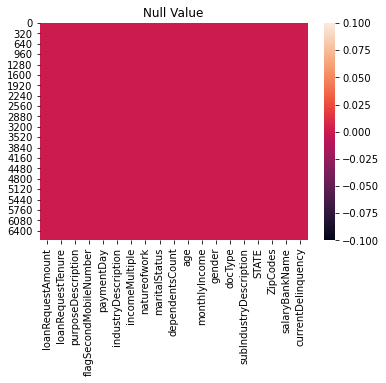

In [15]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Visualization of Data:

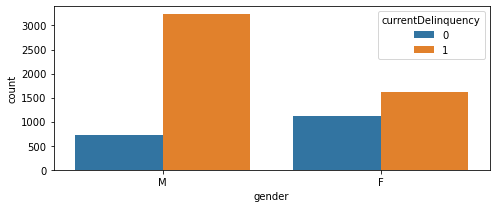

In [16]:
fig = plt.figure(figsize=(7,3))
sns.countplot('gender', hue='currentDelinquency', data=df)
plt.tight_layout()
plt.show()

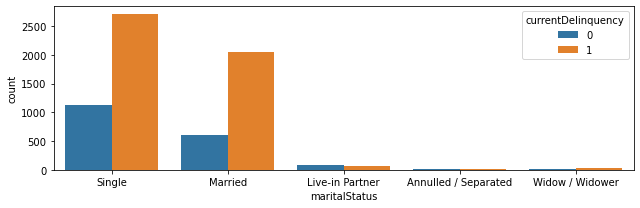

In [17]:
fig = plt.figure(figsize=(9,3))
sns.countplot('maritalStatus', hue='currentDelinquency', data=df)
plt.tight_layout()
plt.show()

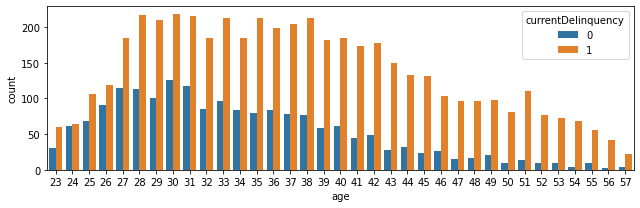

In [18]:
fig = plt.figure(figsize=(9,3))
sns.countplot('age', hue='currentDelinquency', data=df)
plt.tight_layout()
plt.show()

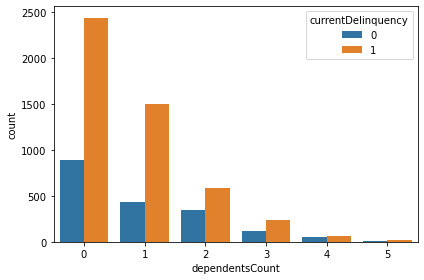

In [19]:
sns.countplot('dependentsCount', hue='currentDelinquency', data=df)
plt.tight_layout()
plt.show()

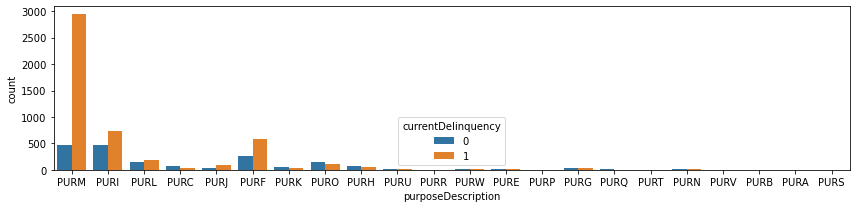

In [20]:
fig = plt.figure(figsize=(12,3))
sns.countplot('purposeDescription', hue='currentDelinquency', data=df)
plt.tight_layout()
plt.show()

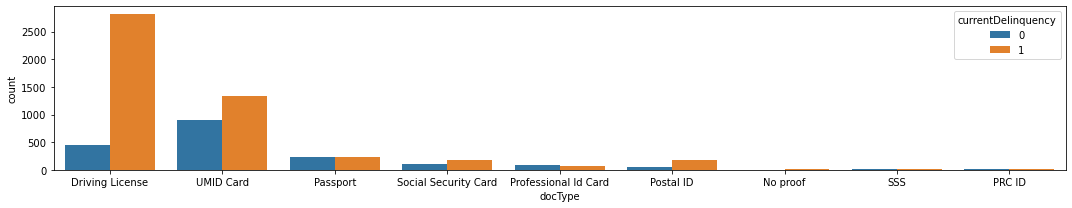

In [21]:
fig=plt.figure(figsize=(15,3))
sns.countplot('docType', hue='currentDelinquency', data=df)
plt.tight_layout()
plt.show()

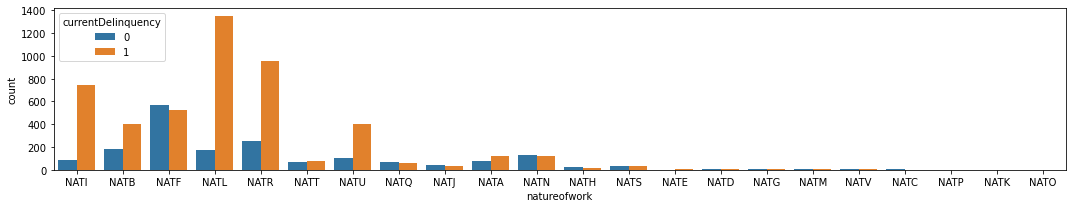

In [22]:
fig=plt.figure(figsize=(15,3))
sns.countplot('natureofwork', hue='currentDelinquency', data=df)
plt.tight_layout()
plt.show()

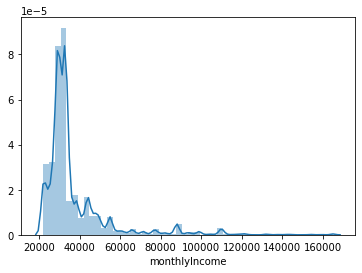

In [23]:
A=sns.distplot(df["monthlyIncome"],kde=True)

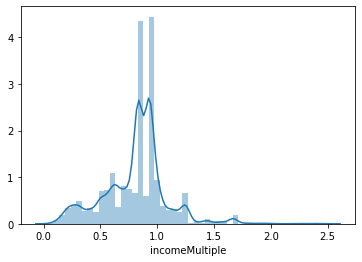

In [24]:
B=sns.distplot(df["incomeMultiple"],kde=True)

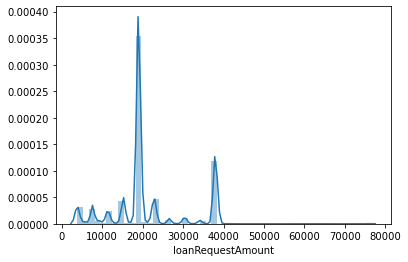

In [25]:
C=sns.distplot(df["loanRequestAmount"],kde=True)

# Encoding the Dataframe:

In [26]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1)).astype(int)
df.head()

,loanRequestAmount,loanRequestTenure,purposeDescription,flagSecondMobileNumber,paymentDay,industryDescription,incomeMultiple,natureofwork,maritalStatus,dependentsCount,age,monthlyIncome,gender,docType,subIndustryDescription,STATE,ZipCodes,salaryBankName,currentDelinquency
0,19000,24,11,0,30,4,0.93,8,3,0,38,29535.0,1,0,12,32,3311,65,1
1,19000,24,11,1,30,4,0.94,1,2,3,51,29315.0,0,8,12,41,1470,29,1
2,38000,24,7,0,30,4,0.36,5,3,0,36,77000.0,0,8,3,53,2010,35,1
3,38000,18,10,0,30,2,0.38,11,2,2,40,71850.9,1,0,19,19,4104,29,0
4,19000,24,7,1,30,2,0.74,1,2,1,52,37400.0,1,0,11,33,3800,29,1


# Describe Dataset

In [27]:
#Statistical Summary
df.describe()

,loanRequestAmount,loanRequestTenure,purposeDescription,flagSecondMobileNumber,paymentDay,industryDescription,incomeMultiple,natureofwork,maritalStatus,dependentsCount,age,monthlyIncome,gender,docType,subIndustryDescription,STATE,ZipCodes,salaryBankName,currentDelinquency
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,21160.328358,20.021642,9.136567,0.578806,26.467164,3.203433,0.812524,10.557015,2.548209,0.821194,36.529104,36885.745075,0.591045,3.439552,10.610000,35.938806,3137.203433,40.338955,0.724925
std,9297.063246,6.143211,3.079579,0.493787,6.843110,1.302891,0.279456,5.892697,0.579985,1.025412,8.167574,16862.705624,0.491678,3.652107,5.291586,12.072830,1500.967741,21.155356,0.446585
min,3800.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.040000,0.000000,0.000000,0.000000,23.000000,22000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19000.000000,12.000000,7.000000,0.000000,26.000000,2.000000,0.660000,5.000000,2.000000,0.000000,30.000000,29535.000000,0.000000,0.000000,11.000000,32.000000,1900.000000,22.000000,0.000000
50%,19000.000000,24.000000,11.000000,1.000000,30.000000,4.000000,0.830000,11.000000,3.000000,1.000000,35.000000,33000.000000,1.000000,3.000000,11.000000,32.000000,3311.000000,29.000000,1.000000
75%,22800.000000,24.000000,11.000000,1.000000,30.000000,4.000000,0.930000,17.000000,3.000000,1.000000,42.000000,38500.000000,1.000000,8.000000,12.000000,41.000000,3507.000000,62.000000,1.000000
max,76000.000000,24.000000,21.000000,1.000000,30.000000,6.000000,2.500000,21.000000,4.000000,5.000000,57.000000,165000.000000,1.000000,8.000000,26.000000,70.000000,9802.000000,81.000000,1.000000


We have a outlier and skewness. So we will check in further step

# Correlation Checking:

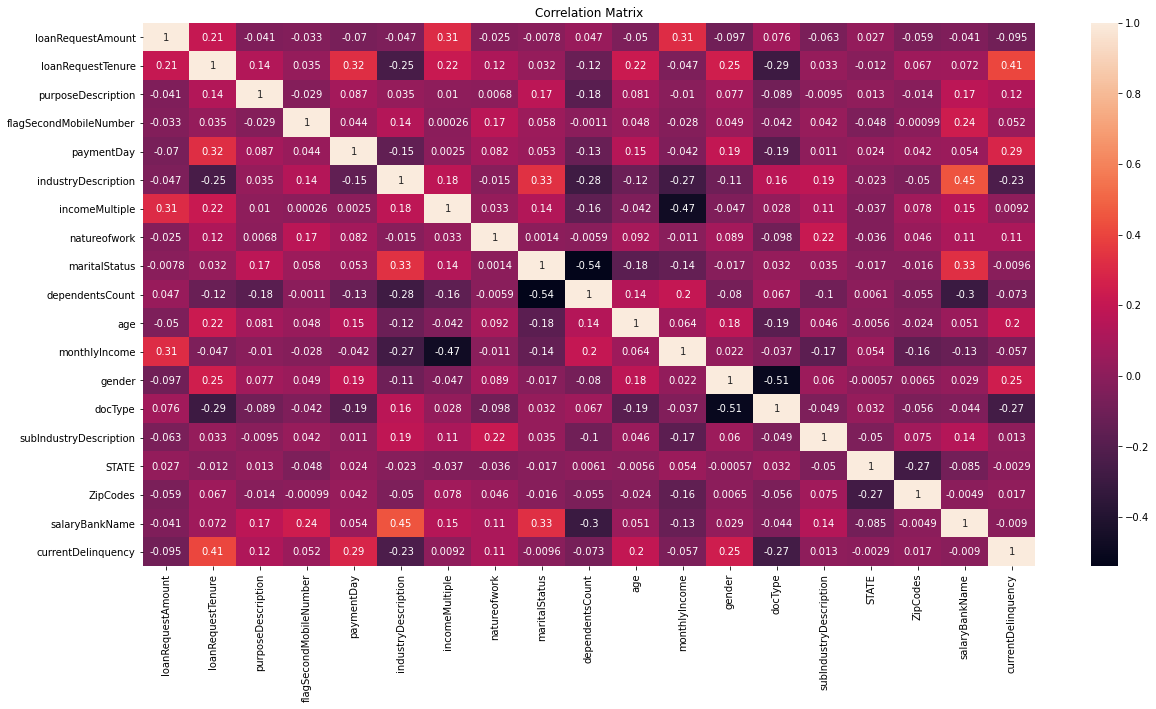

In [28]:
#Correlation using heatmap
corr_mat=df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outlier Checking 

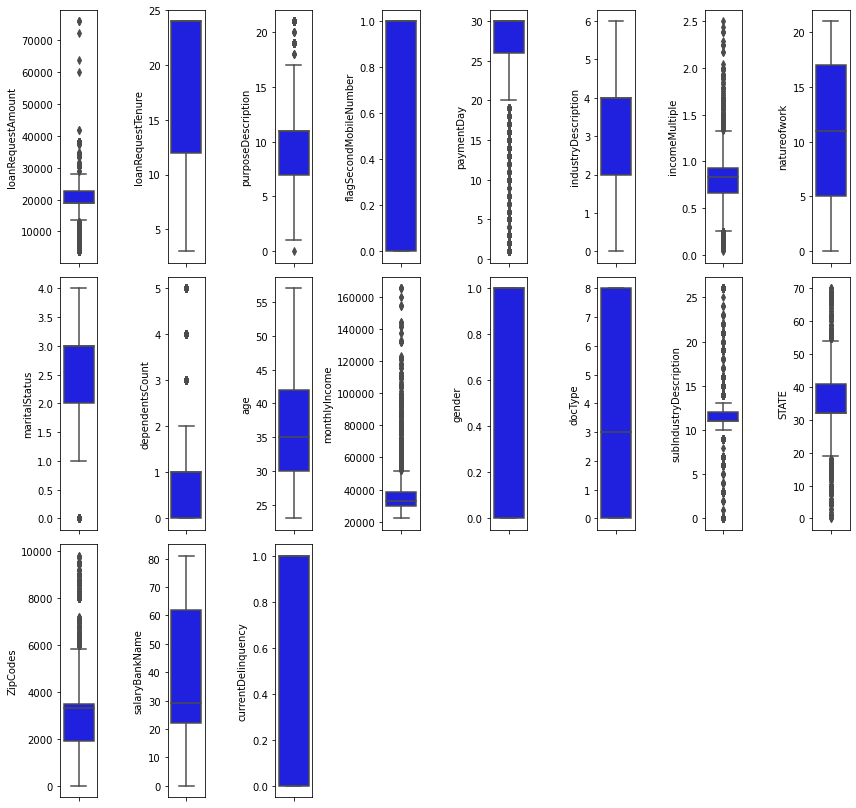

In [29]:
collist=df.columns.values
ncol=8
nrow=4
plt.figure(figsize=(12,15))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have a outlier in nine columns which are loanRequestAmount, purposeDescription, paymentDay, incomeMultiple, dependentsCount, monthlyIncome, subIndustryDescription, STATE, ZipCodes.

Here, I have decided to keep the outlier and the reason which are listed below:
    * There is three converted columns out of 9 columns
    * This columns(loanRequestAmount, paymentDay, dependentsCount, monthlyIncome) data - We should not treat because it is       depend on customer. So, better go with outlier data
    * Zipcode column is kind of categorical - so no use to remove.

# Spliting target variable

In [30]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

# Finding the Model and Random State:

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (0,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(X_train,Y_train)
    predrf=LR.predict(X_test)
    acc = accuracy_score(Y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 78.55721393034825 on Random state 60


Best Accuracy of Logistic Regression is 78.5% and Best Random state is 60

# Creating Train-Test Split

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=60)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train,Y_train)
pred=LR.predict(X_test)
print (accuracy_score(Y_test, pred)*100)
print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))

78.55721393034825
[[ 210  313]
 [ 118 1369]]
              precision    recall  f1-score   support

           0       0.64      0.40      0.49       523
           1       0.81      0.92      0.86      1487

    accuracy                           0.79      2010
   macro avg       0.73      0.66      0.68      2010
weighted avg       0.77      0.79      0.77      2010



In [39]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)
prid=DT.predict(X_test)
print (accuracy_score(Y_test, prid)*100)
print (confusion_matrix(Y_test, prid))
print (classification_report(Y_test, prid))

71.99004975124377
[[ 254  269]
 [ 294 1193]]
              precision    recall  f1-score   support

           0       0.46      0.49      0.47       523
           1       0.82      0.80      0.81      1487

    accuracy                           0.72      2010
   macro avg       0.64      0.64      0.64      2010
weighted avg       0.72      0.72      0.72      2010



In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
predi=RF.predict(X_test)
print (accuracy_score(Y_test, predi)*100)
print (confusion_matrix(Y_test, predi))
print (classification_report(Y_test, predi))

80.24875621890547
[[ 378  145]
 [ 252 1235]]
              precision    recall  f1-score   support

           0       0.60      0.72      0.66       523
           1       0.89      0.83      0.86      1487

    accuracy                           0.80      2010
   macro avg       0.75      0.78      0.76      2010
weighted avg       0.82      0.80      0.81      2010



In [41]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,Y_train)
prd=svc.predict(X_test)
print (accuracy_score(Y_test, prd)*100)
print (confusion_matrix(Y_test, prd))
print (classification_report(Y_test, prd))

74.4776119402985
[[ 191  332]
 [ 181 1306]]
              precision    recall  f1-score   support

           0       0.51      0.37      0.43       523
           1       0.80      0.88      0.84      1487

    accuracy                           0.74      2010
   macro avg       0.66      0.62      0.63      2010
weighted avg       0.72      0.74      0.73      2010



Random Forest score is - 80% - Decision Tree score is - 72% - Logistic Regression Score is - 78% - SVC score is - 74%

We are getting the high accuracy with Random Forest model is 80%. It will be cross check with CV.

# Finding the best CV value:

In [42]:
from sklearn.model_selection import cross_val_score
for j in range (2,6):
    cv_score=cross_val_score(RF,X,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At score fold {j} is having the CV_Score is {cv_mean*100}")

At score fold 2 is having the CV_Score is 78.97014925373134
At score fold 3 is having the CV_Score is 79.31340518627896
At score fold 4 is having the CV_Score is 79.28358208955224
At score fold 5 is having the CV_Score is 79.38805970149254


Based on the above high score of Random Forest. I have runned with RF to find best cv value. Here, I choosed cv=5 is best. Hence. will check the cross validation other model.

In [44]:
from sklearn.model_selection import cross_val_score

score1=cross_val_score(LR,X,Y,cv=5)
score2=cross_val_score(DT,X,Y,cv=5)
score3=cross_val_score(RF,X,Y,cv=5)
score4=cross_val_score(svc,X,Y,cv=5)
print("Cross Validation Score of LR  :",score1.mean()*100)
print("Cross Validation Score of DT  :",score2.mean()*100)
print("Cross Validation Score of RF  :",score3.mean()*100)
print("Cross Validation Score of svc :",score4.mean()*100)

Cross Validation Score of LR  : 76.11940298507463
Cross Validation Score of DT  : 73.92537313432837
Cross Validation Score of RF  : 79.47761194029852
Cross Validation Score of svc : 73.56716417910447


# AUC ROC Curve:

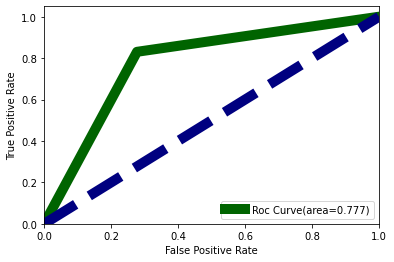

In [49]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(Y_test, predi)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkgreen",lw=10,label='Roc Curve(area=%0.3f)'%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.arange(2,15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(RF,parameters,cv=5)
GCV.fit(X_train,Y_train)
print(GCV.best_params_)

{'criterion': 'gini', 'max_depth': 8}


In [52]:
RF=RandomForestClassifier(criterion="gini",max_depth=8)
RF.fit(X_train,Y_train)
RF.score(X_train,Y_train)
predict=RF.predict(X_test)
AC=accuracy_score(Y_test,predict)
print("RF Score :",AC*100)

cv_score=cross_val_score(RF,X,Y,cv=5)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

RF Score : 80.74626865671641
CV Score : 79.68656716417911


# Model Saving

In [53]:
import pickle
filename='Tonik_Bank.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [54]:
Loaded_load = pickle.load(open('Tonik_Bank.pkl','rb'))
Result=Loaded_load.score(X_test,Y_test)
print(Result*100)

80.74626865671641


In [55]:
Conclusion=pd.DataFrame([Loaded_load.predict(X_test)[:],predict[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

We have a the outcome for this model with 81%(rounded Off) score.